# IMDB Dataset
A set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

## Data Preparation

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [ ]:
# config
NUMBER_OF_WORDS = 10000
VAL_DATA_SIZE = 10000
EPOCHS = 4 # 20 epoch will be over-fit!!
BATCH_SIZE = 512

### Load Data

In [147]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=NUMBER_OF_WORDS)

### Inspect Data

In [148]:
# Inspect train data
print(type(train_data))
print(train_data.ndim)
print(train_data.dtype)
print(train_data.shape)

# Inspect train labels
print(type(train_labels))
print(train_labels.ndim)
print(train_labels.dtype)
print(train_labels.shape)

<class 'numpy.ndarray'>
1
object
(25000,)
<class 'numpy.ndarray'>
1
int64
(25000,)


In [149]:
# Show latest index in words
max([max(seq) for seq in train_data])

9999

In [150]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [151]:
# decode one of these reviews back to English words
word_index = imdb.get_word_index()
reversed_word_index = dict([(v, k) for (k,v) in word_index.items()])
print(" ".join(reversed_word_index.get(i - 3, "?") for i in train_data[0]))
# Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices 
# for “padding,” “start of sequence,” and “unknown.”

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [152]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

### Preparing Data

In [153]:
# Multi-Hot encode
def vectorize_sequences(sequences, dimension=NUMBER_OF_WORDS):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [154]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [155]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## Building Model

### Init Model

In [156]:
model = keras.Sequential([
    layers.Input(shape=(NUMBER_OF_WORDS,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [157]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

### Compile the Model

In [ ]:
model.compile(optimizer="rmsprop",
    loss="mse",#binary_crossentropy
    metrics=["accuracy"])

In [159]:
# Setting aside validation data
x_val = x_train[:VAL_DATA_SIZE]
x_train_partial = x_train[VAL_DATA_SIZE:]
y_val = y_train[:VAL_DATA_SIZE]
y_train_partial = y_train[VAL_DATA_SIZE:]

## Model Training

In [160]:
history = model.fit(x_train_partial,y_train_partial,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val))

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6867 - loss: 0.2132 - val_accuracy: 0.8484 - val_loss: 0.1335
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8799 - loss: 0.1143 - val_accuracy: 0.8674 - val_loss: 0.1052
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9040 - loss: 0.0839 - val_accuracy: 0.8811 - val_loss: 0.0937
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9328 - loss: 0.0647 - val_accuracy: 0.8863 - val_loss: 0.0871


## Evaluation

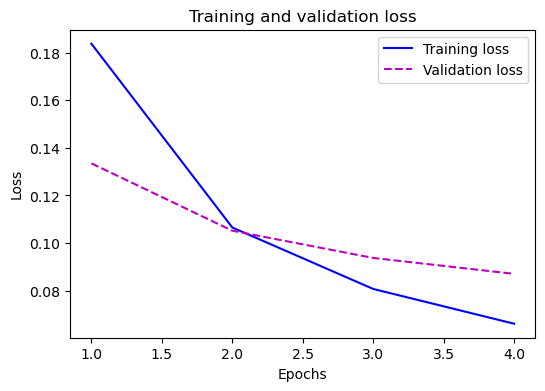

In [161]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.figure(figsize=(6,4))
plt.plot(epochs, loss_values, "b", label="Training loss")
plt.plot(epochs, val_loss_values, "m--", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

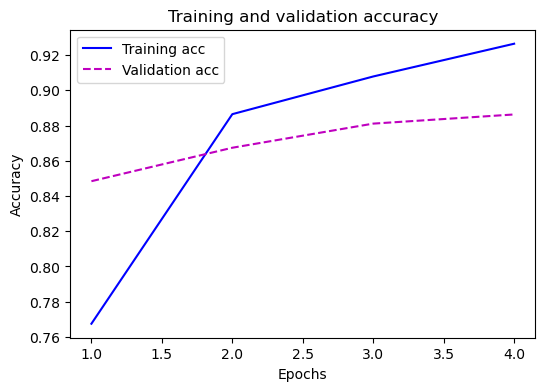

In [162]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.figure(figsize=(6,4))
plt.plot(epochs, acc, "b", label="Training acc")
plt.plot(epochs, val_acc, "m--", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [163]:
test_loss, test_acc = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.8797 - loss: 0.0915


In [164]:
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

Test Loss: 0.09045739471912384
Test Accuracy: 0.8826000094413757
